# Fundamental Analysis
This notebook plots various fundamental statistics of different stocks.  
These links were helpful:  
http://stackoverflow.com/questions/40139537/scrape-yahoo-finance-financial-ratios  
https://automatetheboringstuff.com/chapter11/  

In [72]:
import pandas as pd
import numpy as np
import requests
from pprint import pprint as pp
import matplotlib.pyplot as plt
%matplotlib inline

In [121]:
def get_stats(stock, stats):
    params = {"formatted": "true",
            "crumb": "AKV/cl0TOgz", # works without so not sure of significance
            "lang": "en-US",
            "region": "US",
            "modules": "defaultKeyStatistics,financialData,calendarEvents",
            "corsDomain": "finance.yahoo.com"}

    link="https://query1.finance.yahoo.com/v10/finance/quoteSummary/%s"%stock
    r = requests.get(link, params=params)
    array = []
    for s in stats:
        try:
            data = r.json()[u'quoteSummary']["result"][0]
            array.append(data[u'%s'%s[0]][u'%s'%s[1]][u'raw'])
        except:
            print 'could not get all stats for %s'%stock
            return array
    return array

In [122]:
tickers = pd.read_csv('csv/tsx60.csv',delimiter=",")
print tickers["Sector"].unique()
tickers.head()

['Materials' 'Consumer Staples' 'Energy' 'Financials'
 'Telecommunication Services' 'Information Technology' 'Industrials'
 'Consumer Discretionary' 'Utilities' 'Health Care']


,Symbol,Company,Sector
0,AEM.TO,Agnico Eagle Mines Limited,Materials
1,AGU.TO,Agrium Inc.,Materials
2,ATD-B.TO,Alimentation Couche-Tard Inc.,Consumer Staples
3,ARX.TO,ARC Resources Ltd.,Energy
4,BMO.TO,Bank of Montreal,Financials


In [123]:
stats = [('defaultKeyStatistics','beta'),('defaultKeyStatistics','priceToBook'),('defaultKeyStatistics','trailingEps'),('financialData','currentPrice'),('defaultKeyStatistics','shortRatio'),('financialData','debtToEquity'),('financialData','quickRatio'),('financialData','returnOnEquity'),('financialData','returnOnAssets')]

#stocks = tickers.loc[tickers["Sector"]=="Health Care","Symbol"].values
stocks = tickers["Symbol"].values

results = []
for s in stocks:
    r = get_stats(s,stats)
    if len(r) == len(stats):
        results.append(r)
    else:
        stocks = np.delete(stocks, np.argwhere(stocks==s))

#convert to pandas dataframe
results = pd.DataFrame(results,columns=zip(*stats)[1],index=stocks)
results.head()

could not get all stats for AEM.TO
could not get all stats for BMO.TO
could not get all stats for BNS.TO
could not get all stats for BBD-B.TO
could not get all stats for CM.TO
could not get all stats for FNV.TO
could not get all stats for GIL.TO
could not get all stats for NA.TO
could not get all stats for QSR.TO
could not get all stats for RCI-B
could not get all stats for RY.TO
could not get all stats for TCK-B.TO
could not get all stats for TD.TO
could not get all stats for VRX.TO


In [129]:
#New stocks to check
nstocks = np.asarray(['AW-UN.TO','PZA.TO'])
nresults = []
for s in nstocks:
    r = get_stats(s,stats)
    if len(r) == len(stats):
        nresults.append(r)

nresults = pd.DataFrame(nresults,columns=zip(*stats)[1],index=nstocks)
nresults.head()

,beta,priceToBook,trailingEps,currentPrice,shortRatio,debtToEquity,quickRatio,returnOnEquity,returnOnAssets
AW-UN.TO,1.218030,4.794177,1.480,38.20,1.15,42.739,2.288,0.15475,0.09161
PZA.TO,0.834333,1.966716,0.869,17.49,11.64,17.678,2.823,0.09782,0.06306


In [165]:
#Create new features
#P/E Ratio
results["PE Ratio"] = results["currentPrice"]/results["trailingEps"]
nresults["PE Ratio"] = nresults["currentPrice"]/nresults["trailingEps"]

In [166]:
a = results.loc[results["PE Ratio"]<50]
b, c, names = results["PE Ratio"].values, results["priceToBook"].values, results.index.values
names

array(['AGU.TO', 'ATD-B.TO', 'ARX.TO', 'ABX.TO', 'BCE.TO', 'BB.TO',
       'BAM-A.TO', 'CCO.TO', 'CNR.TO', 'CNQ.TO', 'CP.TO', 'CTC-A.TO',
       'CVE.TO', 'GIB-A.TO', 'CSU.TO', 'CPG.TO', 'DOL.TO', 'ELD.TO',
       'EMA.TO', 'ENB.TO', 'ECA.TO', 'FM.TO', 'FTS.TO', 'WN.TO', 'G.TO',
       'HSE.TO', 'IMO.TO', 'IPL.TO', 'K.TO', 'L.TO', 'MG.TO', 'MFC.TO',
       'MRU.TO', 'PPL.TO', 'POT.TO', 'POW.TO', 'SAP.TO', 'SJR-B.TO',
       'SLW.TO', 'SNC.TO', 'SLF.TO', 'SU.TO', 'T.TO', 'TRI.TO', 'TRP.TO',
       'YRI.TO'], dtype=object)

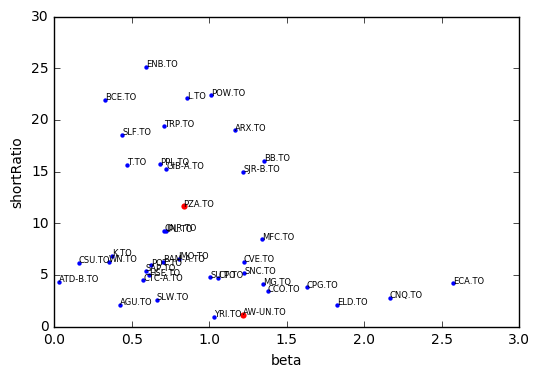

In [171]:
def plot_labels(a,x,y,size,xlo=None,xhi=None,ylo=None,yhi=None):
    arr = a.loc[(a[y]>ylo)&(a[y]<yhi)&(a[x]>xlo)&(a[x]<xhi)]
    arrx, arry, arrnames = arr[x].values, arr[y].values, arr.index.values
    for i in range(len(arrx)):
        plt.text(arrx[i], arry[i], arrnames[i], size=size)

x = "beta"
y = "shortRatio"
xlo,xhi = 0, 3
ylo,yhi = 0, 30
plt.xlim([xlo,xhi])
plt.ylim([ylo,yhi])

#baseline results
plt.scatter(results[x], results[y], lw=0, s=10)
plot_labels(results,x,y,6,xlo,xhi,ylo,yhi)

#new stocks
plt.scatter(nresults[x], nresults[y], lw=0, color='red', s=20)
plot_labels(nresults,x,y,6,xlo,xhi,ylo,yhi)

#labels and ranges

plt.xlabel(x)
plt.ylabel(y)
plt.savefig("plots/%s_v_%s.png"%(x,y))

## Where Each statistic is located

In [49]:
pp(data)

{u'calendarEvents': {u'dividendDate': {u'fmt': u'2016-11-10',
                                       u'raw': 1478736000},
                     u'earnings': {u'earningsAverage': {u'fmt': u'3.22',
                                                        u'raw': 3.22},
                                   u'earningsDate': [{u'fmt': u'2017-01-31',
                                                      u'raw': 1485820800}],
                                   u'earningsHigh': {u'fmt': u'3.77',
                                                     u'raw': 3.77},
                                   u'earningsLow': {u'fmt': u'3.11',
                                                    u'raw': 3.11},
                                   u'revenueAverage': {u'fmt': u'77.39B',
                                                       u'longFmt': u'77,386,500,000',
                                                       u'raw': 77386500000},
                                   u'revenueHigh': {u'fmt': u'86.73B',

# More sophisticated stuff below that is harder but allows more control...
Haven't quite figured this out yet...

In [2]:
import requests
import urllib2
from bs4 import BeautifulSoup  

In [23]:
website = 'https://ca.finance.yahoo.com/quote/AAPL'
page = urllib2.urlopen(website).read()
soup = BeautifulSoup(page, 'html.parser')
#soup = (page, 'html.parser')  

In [16]:
#values = soup.findAll("td", "Ta(end) Fw(b)")
values = soup.find("td", {'data-test':'OPEN-value'})
values

<td class="Ta(end) Fw(b)" data-reactid="348" data-test="OPEN-value">118.77</td>

In [17]:
values.string

u'118.77'

In [28]:
website = "https://ca.finance.yahoo.com/quote/AAPL/key-statistics?p=AAPL"
page = urllib2.urlopen(website).read()
soup = BeautifulSoup(page, 'html.parser')

In [34]:
values = soup.findAll("main",{'class':'Mstart(a) Mend(a)'})
values

[]